# Using Watson to Understand Trump's Communication Style

The 2016 election season possibly changed American politics forever. [](http://news.northeastern.edu/2016/12/how-donald-trump-is-changing-presidential-communication/)

[](http://www.newyorker.com/news/news-desk/first-five-rules-trump)
[](https://www.washingtonpost.com/opinions/the-real-reason-hillary-clinton-lost/2017/05/08/d13c82fc-340f-11e7-b4ee-434b6d506b37_story.html?utm_term=.235c3623c234)

During a free evening, I attended a [Coding Cognitive](http://www.acehotel.com/about/coding-cognitive?utm_campaign=Coding+Cognitive&utm_medium=shortlink&utm_source=https%3A%2F%2Fwww.google.com%2F&utm_content=www.acehotel.com%2Fcodingcognitive) event for a primer on accessing the Watson API. There's all sorts of modules on there, but the one of interest is the "tone analyzer" (These events are awesome, highly recommended!).

Most basic data science courses teach some sort of "sentiment analysis" wherein the words of a text are mapped to a dictionary of scores, and added up to determine an overall "sentiment score". What this simple analysis neglects is the complex relationship between words, how they are formed into phrases, and how these phrases might be related to each other that affect the sentiment. Enter Watson, who holds a "tone analyzing" module that does this for you!

I also figure that since there are only a few examples of the Watson API usage in practice, I figured posting this exploratory project might be a good contribution towards that. First, I'll be importing all the packages I need for today:

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from watson_developer_cloud import ToneAnalyzerV3

Watson's tone analyzer works using json formats, which are a pain to read in a console, so I'll also write something in case I want to print something out nicely.

In [2]:
def pp_json(json_thing, sort=True, indents=4):
    if type(json_thing) is str:
        print(json.dumps(json.loads(json_thing), sort_keys=sort, indent=indents))
    else:
        print(json.dumps(json_thing, sort_keys=sort, indent=indents))
    return None

For today, I'll be investigating how Hillary Clinton and Donald Trump have communicated during their debates. I was able to find the transcripts on a [kaggle kernel](https://www.kaggle.com/mrisdal/2016-us-presidential-debates) already as a csv file.

In [3]:
df = pd.read_csv('C:/Users/Dat Tien Hoang/Desktop/data side projects/2016-us-presidential-debates/debate.csv')

Next, I'll set up the tone analyzer object using my credentials...

In [5]:
tone_analyzer = ToneAnalyzerV3(
    username='521883f2-4423-436e-8cdf-c722428e975f',
    password='EsDihgHYMODr',
    version='2016-05-19')

The data outputted from the tone analyzer is a json dictionary. To give a brief overview of the json structure, I'll print it pretty-like.

In [ ]:
test_str = "Oh my god! I can't believe it. This is awesome"
tone_info = tone_analyzer.tone(text=test_str, sentences=False)
pp_json(tone_info)

In [3]:
df.head()

NameError: name 'df' is not defined

Debate date:  10/19/2016


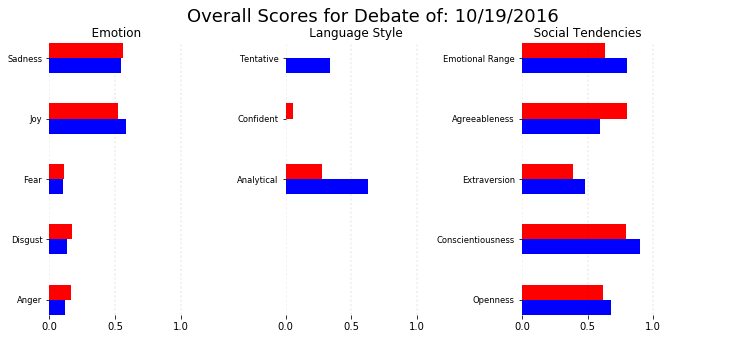

Debate date:  10/4/16
Debate date:  10/9/16


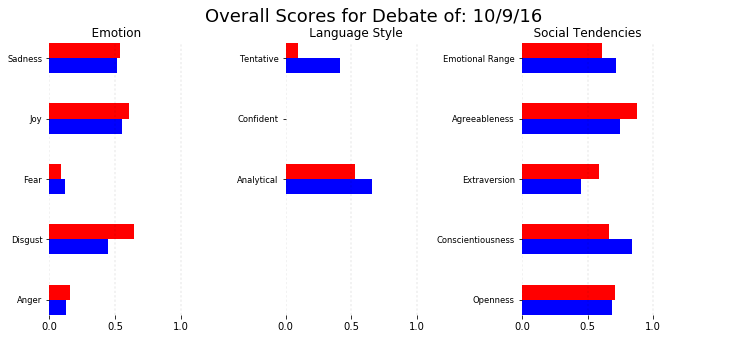

Debate date:  9/26/16


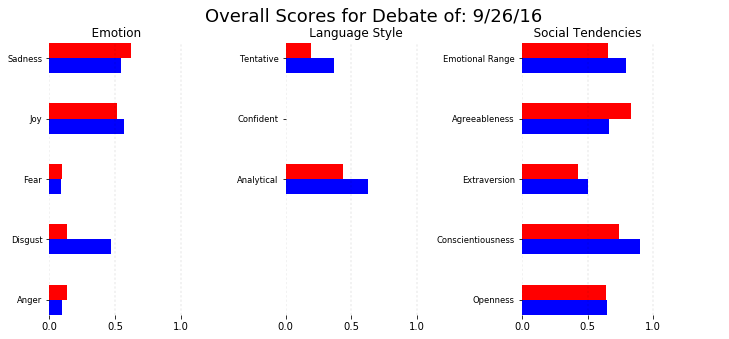

In [6]:
res1 = []
res2 = []
uniq_dates = list(np.unique(df['Date'], return_index=True)[0])
for h in uniq_dates:
    print 'Debate date: ', h
    df_i_HRC = df.ix[(df['Date']== h) & (df['Speaker'] == 'Clinton')] # use | for 'or'
    df_i_DJT = df.ix[(df['Date']== h) & (df['Speaker'] == 'Trump')] 
    HRC = df_i_HRC['Text'].str.cat(sep=' ').decode('latin-1')
    DJT = df_i_DJT['Text'].str.cat(sep=' ').decode('latin-1')
    if len(HRC) != 0 and len(DJT) != 0:
        tone_info1 = tone_analyzer.tone(text=HRC, sentences=False)
        tone_info2 = tone_analyzer.tone(text=DJT, sentences=False)
        
        res1.append(tone_info1)
        res2.append(tone_info2)
        
        labels_h = []
        scores_h = []
        labels_d = []
        scores_d = []
        for i in range(len(tone_info1['document_tone']['tone_categories'])):
            for j in range(len(tone_info1['document_tone']['tone_categories'][i]['tones'])):
                labels_h.append(tone_info1['document_tone']['tone_categories'][i]['tones'][j]['tone_name'])
                scores_h.append(tone_info1['document_tone']['tone_categories'][i]['tones'][j]['score'])
                
                labels_d.append(tone_info2['document_tone']['tone_categories'][i]['tones'][j]['tone_name'])
                scores_d.append(tone_info2['document_tone']['tone_categories'][i]['tones'][j]['score'])
        
        fig = plt.figure(figsize=(12, 5))
        plt.suptitle('Overall Scores for Debate of: ' + str(h), fontsize=18, linespacing=3)
        
        pos = np.arange(len(labels_h[0:5]))
        ax = fig.add_subplot(131)
        plt.barh(pos-0.125, scores_h[0:5], align='center', height=0.25, color='blue')
        plt.barh(pos+0.125, scores_d[0:5], align='center', height=0.25, color='red')
        plt.yticks(range(len(labels_h[0:5])), labels_h[0:5], size='small')
        plt.xticks([0.0, 0.5, 1.0])
        ax.set_xlim([0,1.5])
        ax.set_title('           Emotion', loc='left')
        plt.ylim((-0.25,4.25))
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        
        plt.axvline(x=0.0, color='black', linestyle='dotted', linewidth=0.1)
        plt.axvline(x=0.5, color='black', linestyle='dotted', linewidth=0.1)
        plt.axvline(x=1.0, color='black', linestyle='dotted', linewidth=0.1)
        
        pos = np.arange(len(labels_h[5:8]))
        ax = fig.add_subplot(132)
        plt.barh(pos-0.125+2, scores_h[5:8], align='center', height=0.25, color='blue')
        plt.barh(pos+0.125+2, scores_d[5:8], align='center', height=0.25, color='red')
        plt.yticks([i+2 for i in range(len(labels_h[5:8]))], labels_h[5:8], size='small')
        plt.xticks([0.0, 0.5, 1.0])
        ax.set_xlim([0,1.5])
        ax.set_title('      Language Style', loc='left')
        plt.ylim((-0.25,4.25))
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        
        plt.axvline(x=0.0, color='black', linestyle='dotted', linewidth=0.1)
        plt.axvline(x=0.5, color='black', linestyle='dotted', linewidth=0.1)
        plt.axvline(x=1.0, color='black', linestyle='dotted', linewidth=0.1)
        
        pos = np.arange(len(labels_h[8:13]))
        ax = fig.add_subplot(133)
        plt.barh(pos-0.125, scores_h[8:13], align='center', height=0.25, color='blue')
        plt.barh(pos+0.125, scores_d[8:13], align='center', height=0.25, color='red')
        plt.yticks(range(len(labels_h[8:13])), labels_h[8:13], size='small')
        plt.xticks([0.0, 0.5, 1.0])
        ax.set_xlim([0,1.5])
        ax.set_title('   Social Tendencies', loc='left')
        plt.ylim((-0.25,4.25))
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        
        plt.axvline(x=0.0, color='black', linestyle='dotted', linewidth=0.1)
        plt.axvline(x=0.5, color='black', linestyle='dotted', linewidth=0.1)
        plt.axvline(x=1.0, color='black', linestyle='dotted', linewidth=0.1)
        
        plt.show()
        
        if h == uniq_dates[0]:
            totscore_HRC = scores_h
            totscore_DJT = scores_d
        else:
            totscore_HRC += scores_h
            totscore_DJT += scores_d

Understanding these scores is not straightforward based on their labels alone, since Watson's tone analyzer follows definitions from psycholinguistics (Watson provides links to let you [read more about the science](https://www.ibm.com/watson/developercloud/doc/tone-analyzer/science.html)).

Across the three debates, many of the scores for both Clinton and Trump fluctuate, which makes sense since their content and audience change every debate. There are however, certain categories in which Clinton and Trump consistently differ.

In general, Clinton appeared more conscientious, tentative, and analytical than Trump. She also displays some more emotional range. Watson's definition for conscientiousness is:
>The tendency to act in an organized or thoughtful way.

with a higher score indicating she is perceived to be "more likely to be perceived as disciplined, dutiful, achievement-striving, confident, driven, or organized". Tentativeness, defined as:
>A person's degree of inhibition.

When a person is more tentative, they are "more likely to be perceived as questionable, doubtful, or debatable". T

analytical
>A person's reasoning and analytical attitude about things.

high score means "More likely to be perceived as intellectual, rational, systematic, emotionless, or impersonal."

On the other hand, Trump's tone was always more agreeableness, defined as:
> a tendency to be compassionate and cooperative towards others.

which liberals like myself find hard to believe given the rampantly rascist speech. "More likely to be perceived as caring, sympathetic, cooperative, compromising, trustworthy, or humble."

This supports several observations in which swing voters believed Clinton to be qualified (being methodical and organized) but untrustworthy (too much inhibition). 

[elite](https://medium.com/@Chris_arnade/trump-politics-and-option-pricing-or-why-trump-voters-are-not-idiots-1e364a4ed940)

It is also perhaps why (for example) archetypical coal miners (and others of the [culturally disenfranchised](https://www.theatlantic.com/politics/archive/2017/05/white-working-class-trump-cultural-anxiety/525771/)) felt that Trump had empathy for them.

In the near future, I'd like to include text from Bernie Sanders to understand his communicative appeal (compared to Clinton and Trump). This may let us assess whether or not (as his supporters say) "[Bernie would have won](http://www.salon.com/2017/05/05/yes-bernie-would-probably-have-won-and-his-resurgent-left-wing-populism-is-the-way-forward/)" by his populist tone, as Trump had. 

# References
[IBM Watson: Understanding your Tone Score](https://www.ibm.com/watson/developercloud/doc/tone-analyzer/understand-tone.html)